In [65]:
# импортируем нужные нам библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/clients.csv")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [68]:
# посмотрим, сколько у нас всего NaN в поле пола

df['Gender'].value_counts(dropna=False)

Gender
Female    65726
Male      63823
NaN         331
Name: count, dtype: int64

In [69]:
# просто избавимся от NaN

df.fillna({'Gender' : 'unknown'}, inplace=True)

In [70]:
df['Gender'].value_counts(dropna=False)

# реально получилось

Gender
Female     65726
Male       63823
unknown      331
Name: count, dtype: int64

In [71]:
# посмотрим, есть ли у нас какая-то зависимость между
# полом и удовлетворённостью полётом

# перед этим посмотрим, что лежит в столбце целевой переменной
# (можно было не указывать dropna=False, но на всякий)
df['satisfaction'].value_counts(dropna=False, normalize=True)

satisfaction
neutral or dissatisfied    0.453334
satisfied                  0.346666
-                          0.200000
Name: proportion, dtype: float64

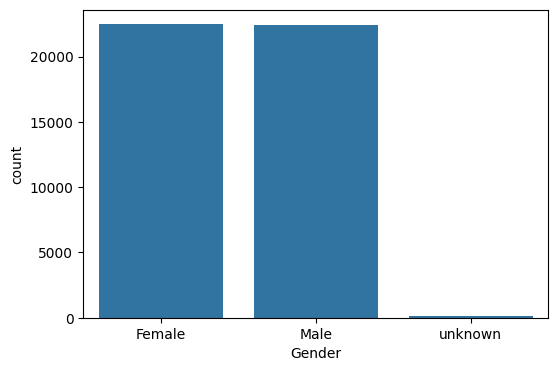

In [72]:
# видим, что есть какая-то черта, имеющаяся у !!!!!20%!!!!!!
# слишком много, заменять на какое-то значение не круто
# поэтому пока отложим эту проблему, решим её чуть позже

# построим графики
plt.figure(figsize=(6, 4))
# так как столбик содержит ещё 3-е значение, просто посмотрим
# какие части составляют мужчины и женщины среди удовлетворенных людей
sns.countplot(x='Gender', data=df[df['satisfaction'] == 'satisfied'])
plt.show()

In [73]:
# данных достаточно много, поэтому мы можем себе позволить выкинуть
# эти жалкие бесполые 331 строчку

df = df[df['Gender'] != 'unknown']

In [74]:
# теперь отобразим гендер в числа: 0 - женщина, 1 - мужчина

df['Gender'].replace({'Female' : 0, 'Male' : 1}, inplace=True)

df['Gender'].value_counts(dropna=False)

C:\Users\Turalchik\AppData\Local\Temp\ipykernel_16808\4214679911.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female' : 0, 'Male' : 1}, inplace=True)
C:\Users\Turalchik\AppData\Local\Temp\ipykernel_16808\4214679911.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[

Gender
0    65726
1    63823
Name: count, dtype: int64

In [75]:
# посмотрим, что у нас в типе клиента

df['Customer Type'].value_counts(dropna=False)

Customer Type
Loyal Customer       105763
disloyal Customer     23709
NaN                      77
Name: count, dtype: int64

In [76]:
# выкинем небольшое (относительно общего числа данных)
# количество строк с NaN из нашего датасета (77)

df = df.dropna(subset='Customer Type')

In [77]:
# точно также забинарим наш тип клиента
# постоянный клиент - 1, иначе - 0

df['Customer Type'].replace({'disloyal Customer' : 0, 'Loyal Customer' : 1}, inplace=True)

C:\Users\Turalchik\AppData\Local\Temp\ipykernel_16808\3233173706.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer Type'].replace({'disloyal Customer' : 0, 'Loyal Customer' : 1}, inplace=True)
C:\Users\Turalchik\AppData\Local\Temp\ipykernel_16808\3233173706.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

In [78]:
# тоже самое сделаем с столбцом типа поездки

df['Type of Travel'].value_counts(dropna=False)
df = df.dropna(subset='Type of Travel')
df['Type of Travel'].replace({'Personal Travel' : 0, 'Business travel' : 1}, inplace=True)

C:\Users\Turalchik\AppData\Local\Temp\ipykernel_16808\612135081.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type of Travel'].replace({'Personal Travel' : 0, 'Business travel' : 1}, inplace=True)
C:\Users\Turalchik\AppData\Local\Temp\ipykernel_16808\612135081.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129371 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129371 non-null  int64  
 1   Gender                             129371 non-null  int64  
 2   Age                                129057 non-null  float64
 3   Customer Type                      129371 non-null  int64  
 4   Type of Travel                     129371 non-null  int64  
 5   Class                              129255 non-null  object 
 6   Flight Distance                    129277 non-null  float64
 7   Departure Delay in Minutes         129264 non-null  float64
 8   Arrival Delay in Minutes           128865 non-null  float64
 9   Inflight wifi service              129327 non-null  float64
 10  Departure/Arrival time convenient  129322 non-null  float64
 11  Ease of Online booking             129328 no

In [80]:
averaged_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

mean_values = round(df[averaged_columns].mean())

df[averaged_columns] = df[averaged_columns].fillna(mean_values)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129371 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129371 non-null  int64  
 1   Gender                             129371 non-null  int64  
 2   Age                                129371 non-null  float64
 3   Customer Type                      129371 non-null  int64  
 4   Type of Travel                     129371 non-null  int64  
 5   Class                              129255 non-null  object 
 6   Flight Distance                    129371 non-null  float64
 7   Departure Delay in Minutes         129371 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129371 non-null  float64
 10  Departure/Arrival time convenient  129371 non-null  float64
 11  Ease of Online booking             129371 no

In [82]:
df.head()

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,1,48.0,0,1,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,0,35.0,1,1,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,1,41.0,1,1,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,1,50.0,1,1,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,0,49.0,1,1,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


In [83]:
# выкинем id, потому что он никак не влияет
# Class, потому что я пока что не знаю, как отобразить
# категориальный признак с 3 значениями в числа (0 1 2 некорректно)

# создадим отдельный df, который будет только с данными для обучения
df_for_training = df.drop(columns=['Class', 'id'])

In [84]:
# теперь после заполнения всех признаков
# мы можем построить модель, которая заполнит
# пропуски в столбце целевой переменной

# также забинарим последний столбец
df_for_training['satisfaction'] = df_for_training['satisfaction'].replace({'neutral or dissatisfied' : 1, 'satisfied' : 0})

In [85]:
# обучим модель на данных строчках, в которых известен последний столбец

df_without_missings = df_for_training[df_for_training['satisfaction'] != '-']

# чтобы обучить модель, нужно привести целевую переменную к int

df_without_missings['satisfaction'] = df_without_missings['satisfaction'].astype('int64')

C:\Users\Turalchik\AppData\Local\Temp\ipykernel_16808\2138523223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_missings['satisfaction'] = df_without_missings['satisfaction'].astype('int64')


In [86]:
# будем обучать вспомогательную модель на всех
# имеющихся данных без пропусков

X = df_without_missings.drop(columns=['satisfaction'])
y = df_without_missings['satisfaction']

In [87]:
# теперь наконец можно обучить модель, чтобы заполнить пропуски в данных

from sklearn.linear_model import LogisticRegression

auxiliary_model = LogisticRegression()

auxiliary_model.fit(X, y)

c:\Users\Turalchik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
# теперь нужно предсказать пропущенные значения

X = df_for_training.drop(columns=['satisfaction'])
y = df_for_training['satisfaction']

pred_for_filling = auxiliary_model.predict(X)

In [89]:
# везде, где есть "-", заменяем их на соответствующие значения из выхода модели

condition = df_for_training['satisfaction'] == '-'

df_for_training.loc[condition, 'satisfaction'] = pred_for_filling[condition]

In [90]:
# теперь мы можем привести последний столбец к int

df_for_training['satisfaction'] = df_for_training['satisfaction'].astype('int64')

In [91]:
# теперь можем обучить нашу основную модель, которая
# будет предсказывать, был доволен клиент или нет

from sklearn.model_selection import train_test_split

X = df_for_training.drop(columns=['satisfaction'])
y = df_for_training['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [92]:
main_model = LogisticRegression()

main_model.fit(X_train, y_train)

main_pred = main_model.predict(X_test)

c:\Users\Turalchik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
# проводим оценку качества нашей модели

from sklearn.metrics import accuracy_score

accuracy_score(y_test, main_pred)

0.7901246019231364

In [94]:
# теперь посмотрим, какую бы мы получили модель,
# если бы просто выкинули те 20% "нехороших" данных

X = df_without_missings.drop(columns=['satisfaction'])
y = df_without_missings['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [95]:
model_without_predicted_data = LogisticRegression()

model_without_predicted_data.fit(X_train, y_train)

pred_without_predicted_data = model_without_predicted_data.predict(X_test)

c:\Users\Turalchik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_without_predicted_data)

0.7433231554129788

In [97]:
# вернём столбец категориальный столбец класса, который мы удалили из датафрейма

df_for_training['Class'] = df['Class']

In [98]:
df_for_training.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Class
0,1,48.0,0,1,821.0,2.0,5.0,3.0,3.0,3.0,...,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,1,Business
1,0,35.0,1,1,821.0,26.0,39.0,2.0,2.0,2.0,...,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,0,Business
2,1,41.0,1,1,853.0,0.0,0.0,4.0,4.0,4.0,...,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,0,Business
3,1,50.0,1,1,1905.0,0.0,0.0,2.0,2.0,2.0,...,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,0,Business
4,0,49.0,1,1,3470.0,0.0,1.0,3.0,3.0,3.0,...,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,0,Business


In [99]:
X = df_for_training.drop(columns=['satisfaction'])
y = df_for_training['satisfaction']

In [100]:
# теперь предобработаем это всё дело

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

categorical = ['Class']
numeric_feature = [col for col in X.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_feature)
])

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [102]:
X_train_transformer = column_transformer.fit_transform(X_train)
X_test_transformer = column_transformer.fit_transform(X_test)

In [103]:
# теперь вернём наш датафрейм в нормальное состояние

lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_feature)

X_train_transformer = pd.DataFrame(X_train_transformer, columns=lst)
X_test_transformer = pd.DataFrame(X_test_transformer, columns=lst)

In [104]:
X_train_transformer

,Class_Eco,Class_Eco Plus,Class_nan,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.0,0.0,0.0,1.0,0.064412,1.0,1.0,0.000498,0.000540,0.000500,...,0.088889,0.166667,0.111111,0.066667,0.066667,0.111111,0.100,0.111111,0.075,0.066667
1,0.0,0.0,0.0,1.0,0.075684,1.0,1.0,0.003978,0.000000,0.001499,...,0.044444,0.166667,0.111111,0.111111,0.111111,0.138889,0.125,0.066667,0.125,0.111111
2,0.0,1.0,0.0,1.0,0.096618,1.0,1.0,0.002863,0.000000,0.000000,...,0.088889,0.133333,0.088889,0.088889,0.088889,0.138889,0.100,0.066667,0.125,0.088889
3,1.0,0.0,0.0,1.0,0.112721,1.0,0.0,0.001565,0.000000,0.000000,...,0.111111,0.166667,0.022222,0.111111,0.088889,0.083333,0.100,0.022222,0.125,0.111111
4,0.0,0.0,0.0,1.0,0.062802,1.0,1.0,0.007123,0.000000,0.000714,...,0.066667,0.100000,0.044444,0.066667,0.066667,0.055556,0.075,0.111111,0.075,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97023,1.0,0.0,0.0,0.0,0.043478,0.0,1.0,0.002795,0.000180,0.000928,...,0.111111,0.100000,0.111111,0.111111,0.066667,0.083333,0.100,0.066667,0.100,0.111111
97024,0.0,1.0,0.0,0.0,0.014493,1.0,0.0,0.001449,0.000000,0.000000,...,0.022222,0.033333,0.022222,0.022222,0.044444,0.083333,0.050,0.022222,0.050,0.022222
97025,1.0,0.0,0.0,0.0,0.035427,0.0,1.0,0.003688,0.000000,0.001000,...,0.022222,0.066667,0.088889,0.022222,0.111111,0.055556,0.125,0.066667,0.100,0.022222
97026,1.0,0.0,0.0,1.0,0.061192,1.0,1.0,0.004602,0.000675,0.001214,...,0.066667,0.100000,0.066667,0.066667,0.066667,0.055556,0.050,0.044444,0.075,0.066667


In [111]:
# теперь самое приятное, можем обучить нашу модельку

model_with_categorial_features = LogisticRegression()

model_with_categorial_features.fit(X_train_transformer, y_train)

pred_with_categorial_features = model_with_categorial_features.predict_proba(X_test_transformer)[:,1]

In [112]:
model_with_categorial_features.coef_, model_with_categorial_features.intercept_

(array([[ 5.47492977e-01,  6.71338957e-01,  5.21335144e-01,
         -3.50701998e-03,  5.99042215e+00, -1.48200707e+00,
         -2.14320700e+00, -8.80610384e-01,  1.28868786e+00,
          1.95853631e+00, -1.34109883e+01,  1.07059532e+01,
          8.83054085e-02,  4.00073018e+00,  4.11467682e+00,
         -2.05834965e+01, -4.09086679e+00, -7.32988041e+00,
         -1.11065070e+01, -8.64731840e+00, -2.23195868e+00,
         -8.37749989e+00, -2.26733298e+00, -5.54785728e+00]]),
 array([8.17869213]))

In [113]:
# посмотрим на интерпретацию нашей модели, какие признаки для неё наиболее важные

importances = pd.DataFrame({'weights' : model_with_categorial_features.coef_[0], 'features' : X_train_transformer.columns}).sort_values(by='weights')
importances

,weights,features
15,-20.583497,Online boarding
10,-13.410988,Inflight wifi service
18,-11.106507,On-board service
19,-8.647318,Leg room service
21,-8.377500,Checkin service
17,-7.329880,Inflight entertainment
23,-5.547857,Cleanliness
16,-4.090867,Seat comfort
22,-2.267333,Inflight service
20,-2.231959,Baggage handling


In [121]:
# для нас наиболее важным является то, как много клиентов останутся довольными
# поэтому нам следует угодить как можно большему количеству недовольных клиентов
# ничего страшного, если мы предоставим "лишний" комфорт и так довольным 

from sklearn.metrics import recall_score, precision_score

classes = pred_with_categorial_features > 0.3

recall_score(y_test, classes), precision_score(y_test, classes)

(np.float64(0.961757163563385), np.float64(0.7822617212297089))